In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import itertools
from scipy.stats import norm
import scipy.stats
from sklearn.naive_bayes import GaussianNB

%matplotlib inline
sns.set()

### Naive Bayes and Optimal Bayes are two different approaches to building probabilistic models, and they differ in their assumptions and the complexity of the model.
#### In summary, the main difference between Naive Bayes and Optimal Bayes is that Naive Bayes makes the simplifying assumption of conditional independence between features, while Optimal Bayes makes no assumptions about the independence of features and seeks to find the best possible model for the given data.
#### In this discussion, we are going to compare the difference between Naive Bayes and Optimal Bayes. We are also going to using gaussian distribution to estimate the mean and covariance with different samples, and compare the performance.

In [2]:
def predict_Bayes_class(X,mu_list,sigma_list): 
    #Returns the predicted class from an optimal bayes classifier - distributions must be known
    scores_list = []
    classes = len(mu_list)
    
    for p in range(classes):
        score = scipy.stats.multivariate_normal.pdf(X, mean=mu_list[p], cov=sigma_list[p])
        scores_list.append(score)
             
    return np.argmax(scores_list)

In [3]:
def class_results(X_data_,y_labels_,mu_list_,sigma_list_):
    #Optimal Bayes accuracy
    y_pred = np.array(  [predict_Bayes_class(np.array([xx,yy]),mu_list_,sigma_list_) 
                        for xx, yy in zip(np.ravel(X_data_[:,0]), np.ravel(X_data_[:,1])) ] )
    print('Training set')
    print('Bayes classifier:',np.mean(y_pred == y_labels_))

    #Naive Bayes accuracy
    model_sk = GaussianNB(priors = None)
    model_sk.fit(X_data_,y_labels_)
    print('Naive Bayes classifier:',model_sk.score(X_data_,y_labels_))

In [4]:
def plot_results(x1_samp_,x2_samp_,y1_samp_,y2_samp_):
    N_samples =len(x1_samp_)
    # find sample mean
    mu1_sam =  np.mean(np.vstack((x1_samp_,y1_samp_)),axis = 1)
    mu2_sam =  np.mean(np.vstack((x2_samp_,y2_samp_)),axis = 1) 
    #estimate sample covariance
    sigma1_sam = np.cov(np.vstack((x1_samp_,y1_samp_))) 
    sigma2_sam = np.cov(np.vstack((x2_samp_,y2_samp_)))
    mu_list = [mu1_sam,mu2_sam]
    sigma_list = [sigma1_sam,sigma2_sam]
    color_list = ['darkblue','darkgreen']

    # Our 2-dimensional distribution will be over variables X and Y
    # N = 100
    X = np.linspace(-8, 8, 50)
    Y = np.linspace(-8, 8, 50)
    X, Y = np.meshgrid(X, Y)

    #Setup of figure
    fig = plt.figure(figsize = (13,6))
    ax = fig.add_subplot(1, 1, 1)

    #Plotting the contours of the Gaussians on left hand side plot

    zz = np.array(  [ predict_Bayes_class(np.array([xx,yy]),mu_list,sigma_list) 
                        for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )

    #Reshaping the predicted class into the meshgrid shape
    Z = zz.reshape(X.shape)

    #Plot the  contours
    ax.contour( X, Y, Z, 1, alpha = .3, colors = ('darkblue','darkgreen'))
    ax.contourf( X, Y, Z, 1, alpha = .1, colors = ('darkblue','darkgreen'))

    #%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#
    #Naive Bayes Classifier
    from sklearn.naive_bayes import GaussianNB

    #Setup X and y data
    X_data_sam = np.asarray(np.vstack((np.hstack((x1_samp_,x2_samp_)),np.hstack((y1_samp_,y2_samp_)))).T)
    y_labels_sam = np.hstack((np.zeros(N_samples),np.ones(N_samples)))

    #Fit model
    model_sk = GaussianNB(priors = None)
    model_sk.fit(X_data_sam,y_labels_sam)

    #Predictions for each point on meshgrid
    zz = np.array(  [model_sk.predict( [[xx,yy]])[0] for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )

    #Reshaping the predicted class into the meshgrid shape
    Z = zz.reshape(X.shape)

    #Plot the  contours
    ax.contour( X, Y, Z, 1, alpha = .3, colors = ('red'))

    ax.scatter(x1_samp_, y1_samp_, alpha = .7)
    ax.scatter(x2_samp_, y2_samp_, alpha = .7)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Optimal (blue) vs Naive (red) Bayes')
    plt.show()

In [5]:
N_data = 4000
mu1 = [2, 2]
sigma1 = [[5, -2], [-2, 5]]
x1, y1 = np.random.multivariate_normal(mu1, sigma1, N_data).T

mu2 = [-2, -2]
sigma2 = [[3.5, 3], [3, 3.5]]
x2, y2 = np.random.multivariate_normal(mu2, sigma2, N_data).T

mu_list = [mu1,mu2]
sigma_list = [sigma1,sigma2]
color_list = ['darkblue','darkgreen']

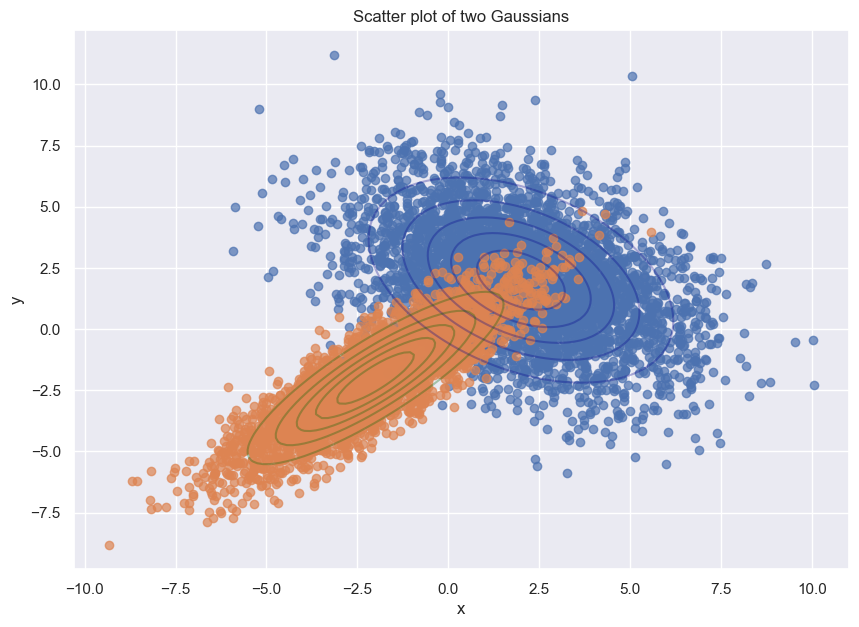

In [6]:
# np.random.seed(seed = 3)

# Our 2-dimensional distribution will be over variables X and Y
# N = 100
X = np.linspace(-8, 8, 100)
Y = np.linspace(-8, 8, 100)
X, Y = np.meshgrid(X, Y)

#Setup of figure
fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot(1, 1, 1)

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#

#Plotting the contours of the Gaussians on left hand side plot
for i in range(2):
    zz = np.array(  [scipy.stats.multivariate_normal.pdf(np.array([xx,yy]), mean=mu_list[i], cov=sigma_list[i]) 
                     for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )

#Reshaping the predicted class into the meshgrid shape
    Z = zz.reshape(X.shape)

#Plot the  contours
    ax.contour( X, Y, Z, 5, alpha = .3, colors = color_list[i])

ax.scatter(x1, y1, alpha = .7)
ax.scatter(x2, y2, alpha = .7)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Scatter plot of two Gaussians')

plt.show()

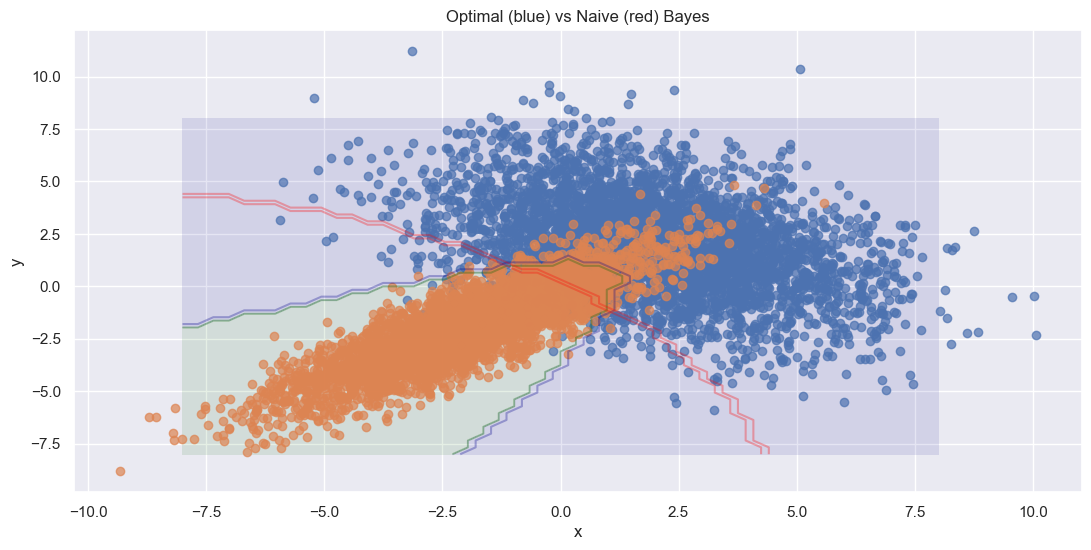

In [7]:
plot_results(x1,x2,y1,y2)

Classification results

In [8]:
X_data = np.asarray(np.vstack((np.hstack((x1,x2)),np.hstack((y1,y2)))).T)
y_labels = np.hstack((np.zeros(N_data),np.ones(N_data)))
class_results(X_data,y_labels,mu_list,sigma_list)

Training set
Bayes classifier: 0.9345
Naive Bayes classifier: 0.90975


Sample the dataset

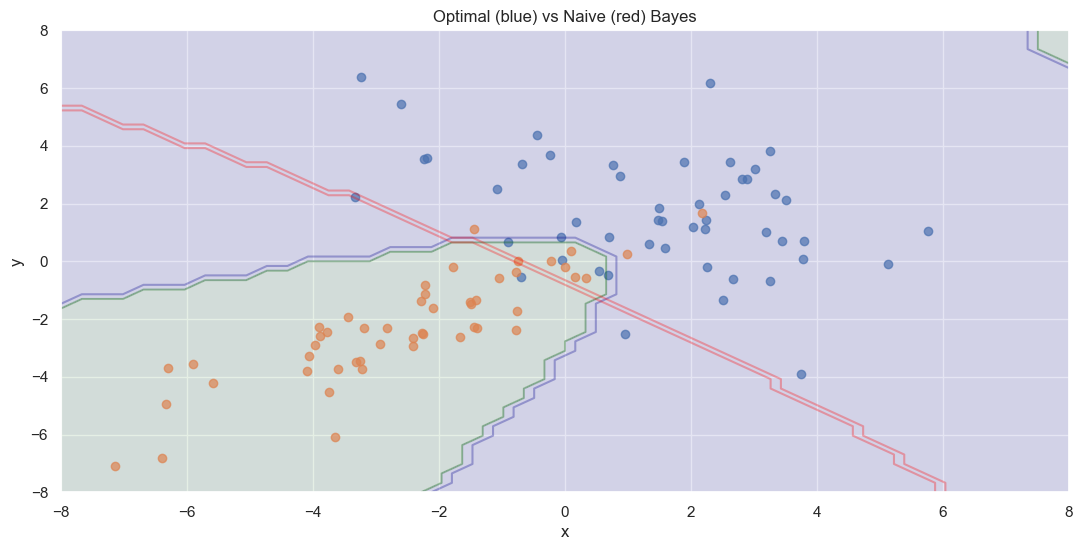

Training set
Bayes classifier: 0.93
Naive Bayes classifier: 0.89


In [9]:
N_samples = 50
class_1_ind = np.random.choice(N_data, N_samples)
class_2_ind = np.random.choice(N_data, N_samples)
x1_samp = x1[class_1_ind]
y1_samp = y1[class_1_ind]
x2_samp = x2[class_1_ind]
y2_samp = y2[class_1_ind]
plot_results(x1_samp,x2_samp,y1_samp,y2_samp)
X_data_sam = np.asarray(np.vstack((np.hstack((x1_samp,x2_samp)),np.hstack((y1_samp,y2_samp)))).T)
y_labels_sam = np.hstack((np.zeros(N_samples),np.ones(N_samples)))
mu1_sam =  np.mean(np.vstack((x1_samp,y1_samp)),axis = 1)
mu2_sam =  np.mean(np.vstack((x2_samp,y2_samp)),axis = 1) 
sigma1_sam = np.cov(np.vstack((x1_samp,y1_samp))) 
sigma2_sam = np.cov(np.vstack((x2_samp,y2_samp)))
mu_list = [mu1_sam,mu2_sam]
sigma_list = [sigma1_sam,sigma2_sam]
class_results(X_data_sam,y_labels_sam,mu_list,sigma_list)

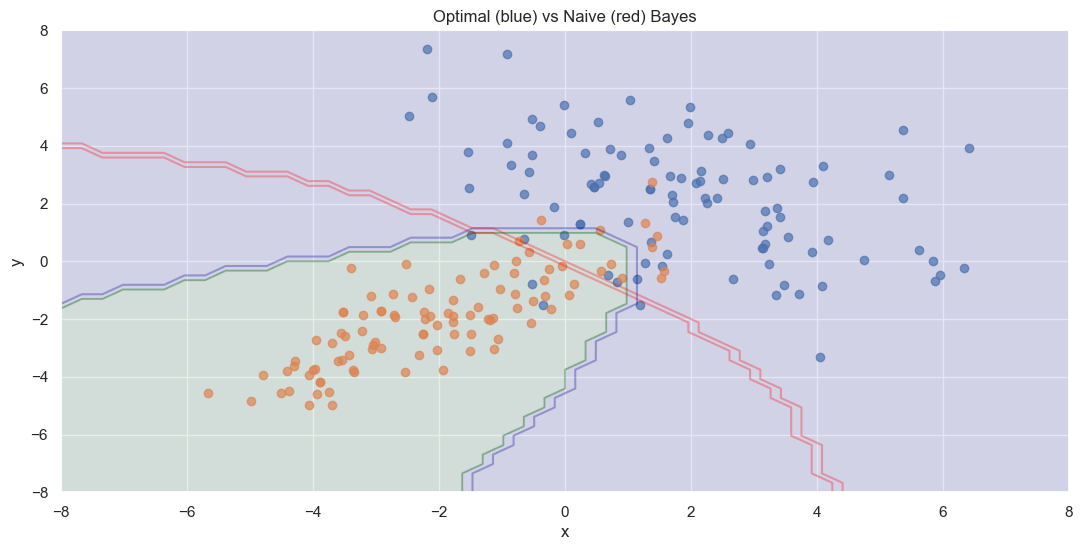

Training set
Bayes classifier: 0.93
Naive Bayes classifier: 0.91


In [10]:
N_samples = 100
class_1_ind = np.random.choice(N_data, N_samples)
class_2_ind = np.random.choice(N_data, N_samples)
x1_samp = x1[class_1_ind]
y1_samp = y1[class_1_ind]
x2_samp = x2[class_1_ind]
y2_samp = y2[class_1_ind]
plot_results(x1_samp,x2_samp,y1_samp,y2_samp)
X_data_sam = np.asarray(np.vstack((np.hstack((x1_samp,x2_samp)),np.hstack((y1_samp,y2_samp)))).T)
y_labels_sam = np.hstack((np.zeros(N_samples),np.ones(N_samples)))
mu1_sam =  np.mean(np.vstack((x1_samp,y1_samp)),axis = 1)
mu2_sam =  np.mean(np.vstack((x2_samp,y2_samp)),axis = 1) 
sigma1_sam = np.cov(np.vstack((x1_samp,y1_samp))) 
sigma2_sam = np.cov(np.vstack((x2_samp,y2_samp)))
mu_list = [mu1_sam,mu2_sam]
sigma_list = [sigma1_sam,sigma2_sam]
class_results(X_data_sam,y_labels_sam,mu_list,sigma_list)


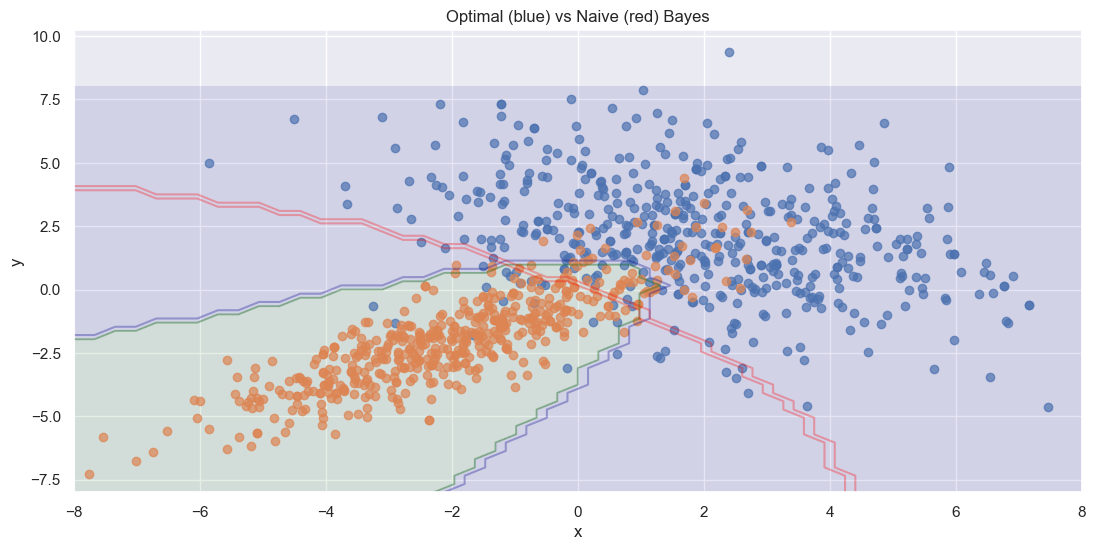

Training set
Bayes classifier: 0.928
Naive Bayes classifier: 0.908


In [11]:
# 500 samples
N_samples = 500
class_1_ind = np.random.choice(N_data, N_samples)
class_2_ind = np.random.choice(N_data, N_samples)
x1_samp = x1[class_1_ind]
y1_samp = y1[class_1_ind]
x2_samp = x2[class_1_ind]
y2_samp = y2[class_1_ind]
plot_results(x1_samp,x2_samp,y1_samp,y2_samp)
X_data_sam = np.asarray(np.vstack((np.hstack((x1_samp,x2_samp)),np.hstack((y1_samp,y2_samp)))).T)
y_labels_sam = np.hstack((np.zeros(N_samples),np.ones(N_samples)))
mu1_sam =  np.mean(np.vstack((x1_samp,y1_samp)),axis = 1)
mu2_sam =  np.mean(np.vstack((x2_samp,y2_samp)),axis = 1) 
sigma1_sam = np.cov(np.vstack((x1_samp,y1_samp))) 
sigma2_sam = np.cov(np.vstack((x2_samp,y2_samp)))
mu_list = [mu1_sam,mu2_sam]
sigma_list = [sigma1_sam,sigma2_sam]
class_results(X_data_sam,y_labels_sam,mu_list,sigma_list)


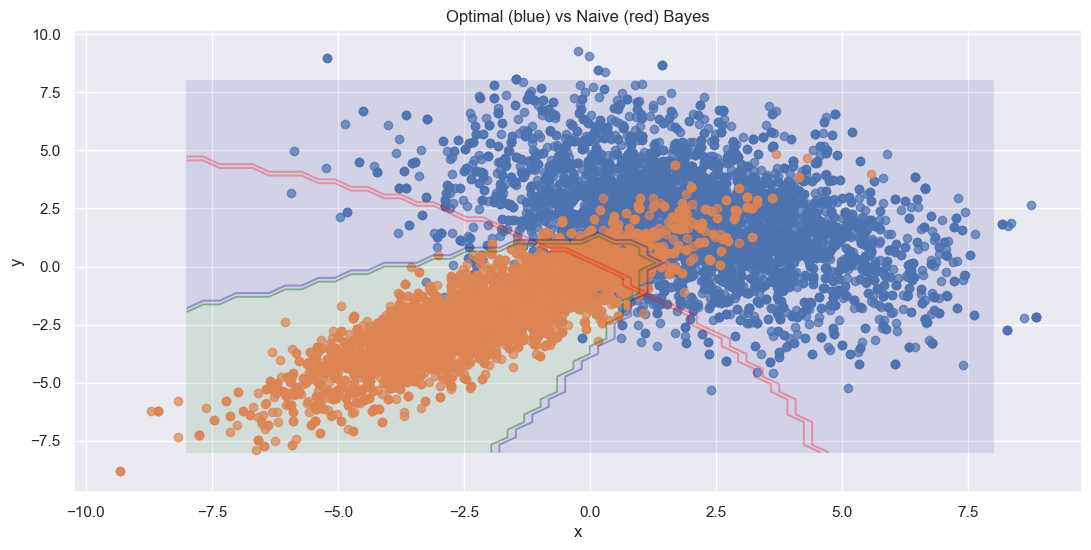

Training set
Bayes classifier: 0.9371
Naive Bayes classifier: 0.9118


In [12]:
# 500 samples
N_samples = 5000
class_1_ind = np.random.choice(N_data, N_samples)
class_2_ind = np.random.choice(N_data, N_samples)
x1_samp = x1[class_1_ind]
y1_samp = y1[class_1_ind]
x2_samp = x2[class_1_ind]
y2_samp = y2[class_1_ind]
plot_results(x1_samp,x2_samp,y1_samp,y2_samp)
X_data_sam = np.asarray(np.vstack((np.hstack((x1_samp,x2_samp)),np.hstack((y1_samp,y2_samp)))).T)
y_labels_sam = np.hstack((np.zeros(N_samples),np.ones(N_samples)))
mu1_sam =  np.mean(np.vstack((x1_samp,y1_samp)),axis = 1)
mu2_sam =  np.mean(np.vstack((x2_samp,y2_samp)),axis = 1) 
sigma1_sam = np.cov(np.vstack((x1_samp,y1_samp))) 
sigma2_sam = np.cov(np.vstack((x2_samp,y2_samp)))
mu_list = [mu1_sam,mu2_sam]
sigma_list = [sigma1_sam,sigma2_sam]
class_results(X_data_sam,y_labels_sam,mu_list,sigma_list)


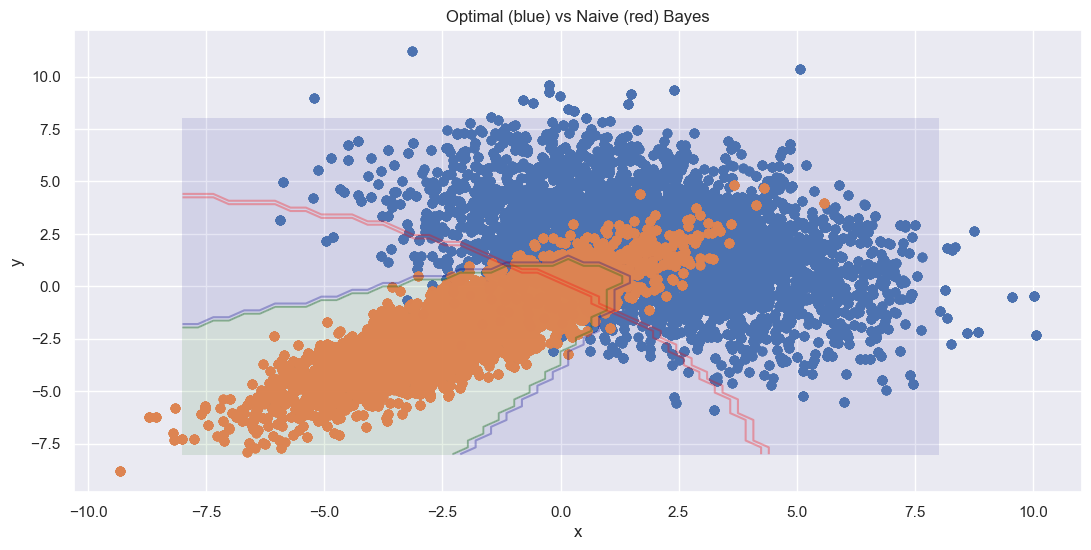

Training set
Bayes classifier: 0.93428
Naive Bayes classifier: 0.91008


In [13]:
# 50000 samples
N_samples = 50000
class_1_ind = np.random.choice(N_data, N_samples)
class_2_ind = np.random.choice(N_data, N_samples)
x1_samp = x1[class_1_ind]
y1_samp = y1[class_1_ind]
x2_samp = x2[class_1_ind]
y2_samp = y2[class_1_ind]
plot_results(x1_samp,x2_samp,y1_samp,y2_samp)
X_data_sam = np.asarray(np.vstack((np.hstack((x1_samp,x2_samp)),np.hstack((y1_samp,y2_samp)))).T)
y_labels_sam = np.hstack((np.zeros(N_samples),np.ones(N_samples)))
mu1_sam =  np.mean(np.vstack((x1_samp,y1_samp)),axis = 1)
mu2_sam =  np.mean(np.vstack((x2_samp,y2_samp)),axis = 1) 
sigma1_sam = np.cov(np.vstack((x1_samp,y1_samp))) 
sigma2_sam = np.cov(np.vstack((x2_samp,y2_samp)))
mu_list = [mu1_sam,mu2_sam]
sigma_list = [sigma1_sam,sigma2_sam]
class_results(X_data_sam,y_labels_sam,mu_list,sigma_list)


Comparing Optimal Bayes and Naive Bayes - zero covariance

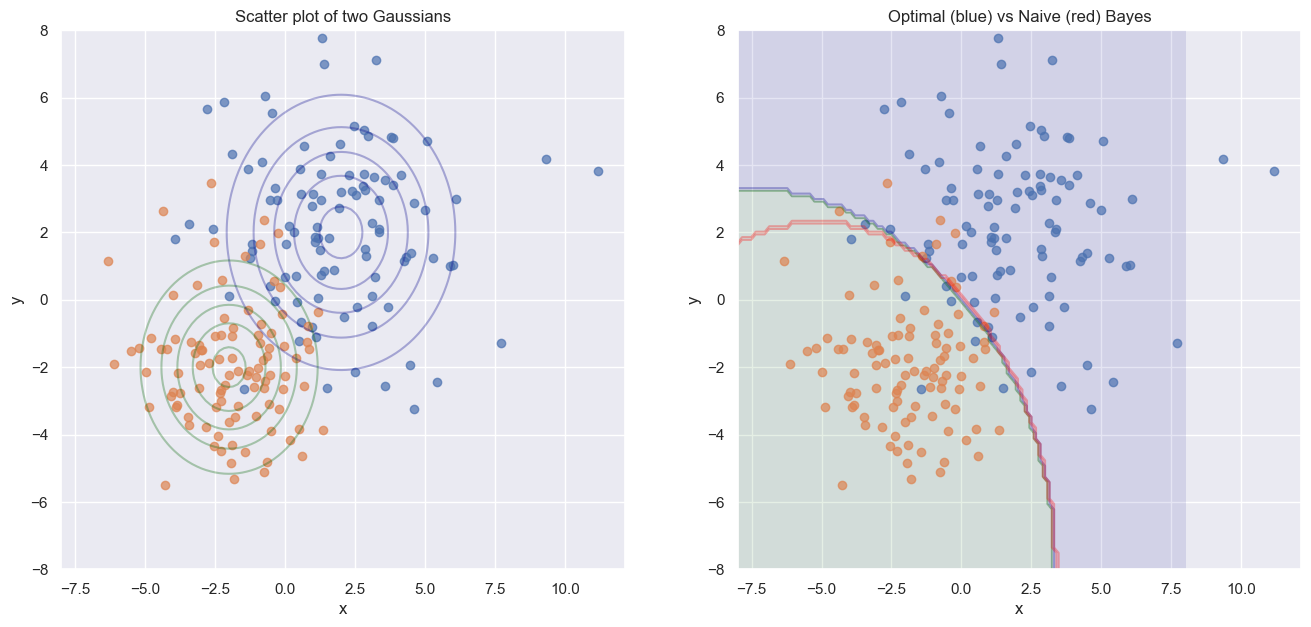

In [14]:
np.random.seed(seed = 2)

mu1 = [2, 2]
sigma1 = [[5, 0], [0, 5]]
x1, y1 = np.random.multivariate_normal(mu1, sigma1, 100).T

mu2 = [-2, -2]
sigma2 = [[3, 0], [0, 3]]
x2, y2 = np.random.multivariate_normal(mu2, sigma2, 100).T

mu_list = [mu1,mu2]
sigma_list = [sigma1,sigma2]
color_list = ['darkblue','darkgreen']

# Our 2-dimensional distribution will be over variables X and Y
N = 100
X = np.linspace(-8, 8, N)
Y = np.linspace(-8, 8, N)
X, Y = np.meshgrid(X, Y)

#Setup of figure
fig = plt.figure(figsize = (16,7))
ax = fig.add_subplot(1, 2, 1)

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#

#Plotting the contours of the Gaussians on left hand side plot
for i in range(2):
    zz = np.array(  [scipy.stats.multivariate_normal.pdf(np.array([xx,yy]), mean=mu_list[i], cov=sigma_list[i]) 
                     for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )

#Reshaping the predicted class into the meshgrid shape
    Z = zz.reshape(X.shape)

#Plot the  contours
    ax.contour( X, Y, Z, 5, alpha = .3, colors = color_list[i])


ax.scatter(x1, y1, alpha = .7)
ax.scatter(x2, y2, alpha = .7)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Scatter plot of two Gaussians')

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#

#Right hand side plot - Optimal Bayes classifier
ax = fig.add_subplot(1, 2, 2)

#Plotting the contours of the Gaussians on left hand side plot

zz = np.array(  [ predict_Bayes_class(np.array([xx,yy]),mu_list,sigma_list) 
                     for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )

#Reshaping the predicted class into the meshgrid shape
Z = zz.reshape(X.shape)

#Plot the  contours
ax.contour( X, Y, Z, 1, alpha = .3, colors = ('darkblue','darkgreen'))
ax.contourf( X, Y, Z, 1, alpha = .1, colors = ('darkblue','darkgreen'))

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#
#Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

#Setup X and y data
X_data = np.asarray(np.vstack((np.hstack((x1,x2)),np.hstack((y1,y2)))).T)
y_labels = np.hstack((np.zeros(100),np.ones(100)))

#Fit model
model_sk = GaussianNB(priors = None)
model_sk.fit(X_data,y_labels)

#Predictions for each point on meshgrid
zz = np.array(  [model_sk.predict( [[xx,yy]])[0] for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )

#Reshaping the predicted class into the meshgrid shape
Z = zz.reshape(X.shape)

#Plot the  contours
ax.contour( X, Y, Z, 1, alpha = .3, colors = ('red'))



ax.scatter(x1, y1, alpha = .7)
ax.scatter(x2, y2, alpha = .7)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Optimal (blue) vs Naive (red) Bayes')

plt.show()


In [15]:
#Optimal Bayes accuracy
y_pred = np.array(  [predict_Bayes_class(np.array([xx,yy]),mu_list,sigma_list) 
                     for xx, yy in zip(np.ravel(X_data[:,0]), np.ravel(X_data[:,1])) ] )
display(np.mean(y_pred == y_labels))


#Naive Bayes accuracy
display(model_sk.score(X_data,y_labels))

0.91

0.91